In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df_tracks = pd.read_csv("tracks.csv")

In [57]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [58]:
#Converting duration in milliseconds to seconds

df_tracks["duration"] = df_tracks["duration_ms"].apply(lambda x : round(x/1000))

In [59]:
#Dropping milliseconds column

df_tracks.drop("duration_ms", inplace = True, axis = 1)

In [60]:
df_tracks.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163


In [61]:
#Changing Index to released date

df_tracks.set_index('release_date', inplace = True)
df_tracks.index=pd.to_datetime(df_tracks.index, format='mixed')

In [62]:
df_tracks.head()


,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163


In [63]:
df_tracks['dates']=df_tracks.index.get_level_values('release_date')
df_tracks.dates=pd.to_datetime(df_tracks.dates)
df_tracks['year']=df_tracks.dates.dt.year

In [64]:
df_tracks.head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates,year
release_date,,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922-02-22,1922
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922-06-01,1922
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922-03-21,1922
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922-03-21,1922
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922-01-01,1922


In [65]:
#Dropping unnecessary columns which are not playing any part in the analysis

df_tracks.drop(['id','dates', 'id_artists'], axis = 1, inplace = True)
df_tracks.head()

,name,popularity,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,year
release_date,,,,,,,,,,,,,,,,,,
1922-02-22,Carve,6,0,['Uli'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922
1922-06-01,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922
1922-03-21,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922
1922-03-21,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922
1922-01-01,Lady of the Evening,0,0,['Dick Haymes'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922


In [66]:
#Rearrganging dataframe for readability

df_tracks = df_tracks[['name', 'artists', 'year', 'duration', 'explicit', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' , 'time_signature', 'key', 'mode']]

In [67]:
df_tracks.head()

,name,artists,year,duration,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key,mode
release_date,,,,,,,,,,,,,,,,,,
1922-02-22,Carve,['Uli'],1922,127,0,6,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,3,0,1
1922-06-01,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],1922,98,0,0,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,1,0,1
1922-03-21,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],1922,182,0,0,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1,1
1922-03-21,El Prisionero - Remasterizado,['Ignacio Corsini'],1922,177,0,0,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,3,7,1
1922-01-01,Lady of the Evening,['Dick Haymes'],1922,163,0,0,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,4,3,0


In [68]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 586672 entries, 1922-02-22 to 2015-07-01
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              586601 non-null  object 
 1   artists           586672 non-null  object 
 2   year              586672 non-null  int32  
 3   duration          586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   popularity        586672 non-null  int64  
 6   danceability      586672 non-null  float64
 7   energy            586672 non-null  float64
 8   loudness          586672 non-null  float64
 9   speechiness       586672 non-null  float64
 10  acousticness      586672 non-null  float64
 11  instrumentalness  586672 non-null  float64
 12  liveness          586672 non-null  float64
 13  valence           586672 non-null  float64
 14  tempo             586672 non-null  float64
 15  time_signature    586672 non-null  int64  
 16  key 

In [69]:
# Checking null values

pd.isnull(df_tracks).sum()

name                71
artists              0
year                 0
duration             0
explicit             0
popularity           0
danceability         0
energy               0
loudness             0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
key                  0
mode                 0
dtype: int64

Since the numbers of rows with missing name is significantly small compared to total number of rows, we can remove these tracks from out dataset

In [71]:
#Dropping rows with name attribute for tracks missing.

df_tracks.dropna(subset=['name'], inplace=True)

In [72]:
pd.isnull(df_tracks).sum()

name                0
artists             0
year                0
duration            0
explicit            0
popularity          0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
key                 0
mode                0
dtype: int64

In [73]:
#Checking if categorical variables have unique values or not

print(df_tracks["mode"].unique()) # Should be either 0 or 1
print(df_tracks["key"].unique()) # Should be values from 0 to 11
print(df_tracks["explicit"].unique()) # Should be either 0 or 1

[1 0]
[ 0  1  7  3  5  4  6 11  2  8 10  9]
[0 1]


In [74]:
#Checking if continuous variables are within the acceptable ranges

print(str(df_tracks["year"].min()) + " – " + str(df_tracks["year"].max())) # Range: [1921 – 2020]
print(str(df_tracks["acousticness"].min()) + " – " + str(df_tracks["acousticness"].max())) # Range: [0.0 – 1.0]
print(str(df_tracks["danceability"].min()) + " – " + str(df_tracks["danceability"].max())) # Range: [0.0 – 1.0]
print(str(df_tracks["energy"].min()) + " – " + str(df_tracks["energy"].max())) # Range: [0.0 – 1.0]
print(str(df_tracks["instrumentalness"].min()) + " – " + str(df_tracks["instrumentalness"].max())) # Range: [0.0 – 1.0]
print(str(df_tracks["speechiness"].min()) + " – " + str(df_tracks["speechiness"].max())) # Range: [0.0 – 1.0]
print(str(df_tracks["valence"].min()) + " – " + str(df_tracks["valence"].max())) # Range: [0.0 – 1.0]
print(str(df_tracks["popularity"].min()) + " – " + str(df_tracks["popularity"].max())) # Range: [0 – 100]

1900 – 2021
0.0 – 0.996
0.0 – 0.991
0.0 – 1.0
0.0 – 1.0
0.0 – 0.971
0.0 – 1.0
0 – 100


In [75]:
df_tracks.describe()

,year,duration,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key,mode
count,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,1988.571729,230.054333,0.044091,27.573212,0.563612,0.542071,-10.205789,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410,5.221594,0.658797
std,22.826243,126.532822,0.205298,18.369417,0.166101,0.251910,5.089422,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112,3.519420,0.474114
min,1900.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1974.000000,175.000000,0.000000,13.000000,0.453000,0.343000,-12.891000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000,2.000000,0.000000
50%,1992.000000,215.000000,0.000000,27.000000,0.577000,0.549000,-9.242000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000,5.000000,1.000000
75%,2007.000000,264.000000,0.000000,41.000000,0.686000,0.748000,-6.481000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000,8.000000,1.000000
max,2021.000000,5621.000000,1.000000,100.000000,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,11.000000,1.000000


In [76]:
#Checking for duplicate rows 


df_tracks[df_tracks.duplicated()]

,name,artists,year,duration,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key,mode
release_date,,,,,,,,,,,,,,,,,,
1925-01-01,Pause Track,['Louis Armstrong'],1925,4,0,0,0.000,0.000,-60.000,0.0000,0.000,0.000000,0.0000,0.0000,0.000,0,0,0
1925-01-01,Pause Track,['Louis Armstrong'],1925,4,0,0,0.000,0.000,-60.000,0.0000,0.000,0.000000,0.0000,0.0000,0.000,0,0,0
1925-01-01,Pause Track,['Louis Armstrong'],1925,4,0,0,0.000,0.000,-60.000,0.0000,0.000,0.000000,0.0000,0.0000,0.000,0,0,0
1925-01-01,Pause Track,['Louis Armstrong'],1925,3,0,0,0.000,0.000,-60.000,0.0000,0.000,0.000000,0.0000,0.0000,0.000,0,0,0
1925-01-01,Pause Track,['Louis Armstrong'],1925,3,0,0,0.000,0.000,-60.000,0.0000,0.000,0.000000,0.0000,0.0000,0.000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948-01-01,Le villi: Se come voi piccina io fossi,"['Giacomo Puccini', 'Kiri Te Kanawa', 'Sir Joh...",1948,320,0,0,0.206,0.206,-14.676,0.0405,0.975,0.028100,0.1190,0.0530,89.480,4,7,1
1948-01-01,Madama Butterfly: The Flower Duet,"['Giacomo Puccini', 'Gillian Knight', 'Renata ...",1948,298,0,0,0.287,0.171,-17.937,0.0434,0.983,0.000786,0.3070,0.0685,115.728,5,8,1
1983-01-01,留不住你的心,['Teresa Teng'],1983,208,0,14,0.408,0.423,-10.428,0.0405,0.213,0.001430,0.0739,0.3260,125.810,3,9,1


Based on the table above, there are 1898 rows of duplicated data (not counting the first recorded instance for each).
It's best to drop these rows since multiple instances of the same song will compromise our EDA exercise

In [78]:
#Dropping duplicates and checking again for same

df_tracks.drop_duplicates(inplace=True)
df_tracks[df_tracks.duplicated()]

,name,artists,year,duration,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key,mode
release_date,,,,,,,,,,,,,,,,,,


Since above output is an emtpy dataframe, we have successfully removed all duplicate entries

In [80]:
df_tracks.head()

,name,artists,year,duration,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key,mode
release_date,,,,,,,,,,,,,,,,,,
1922-02-22,Carve,['Uli'],1922,127,0,6,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,3,0,1
1922-06-01,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],1922,98,0,0,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,1,0,1
1922-03-21,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],1922,182,0,0,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1,1
1922-03-21,El Prisionero - Remasterizado,['Ignacio Corsini'],1922,177,0,0,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,3,7,1
1922-01-01,Lady of the Evening,['Dick Haymes'],1922,163,0,0,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,4,3,0


In [81]:
df_tracks.shape

(584703, 18)

In [82]:
df_tracks.to_csv("Cleaned_Dataset.csv")

[Text(0.5, 0, 'year'),
 Text(1.5, 0, 'duration'),
 Text(2.5, 0, 'popularity'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'acousticness'),
 Text(8.5, 0, 'instrumentalness'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo'),
 Text(12.5, 0, 'time_signature')]

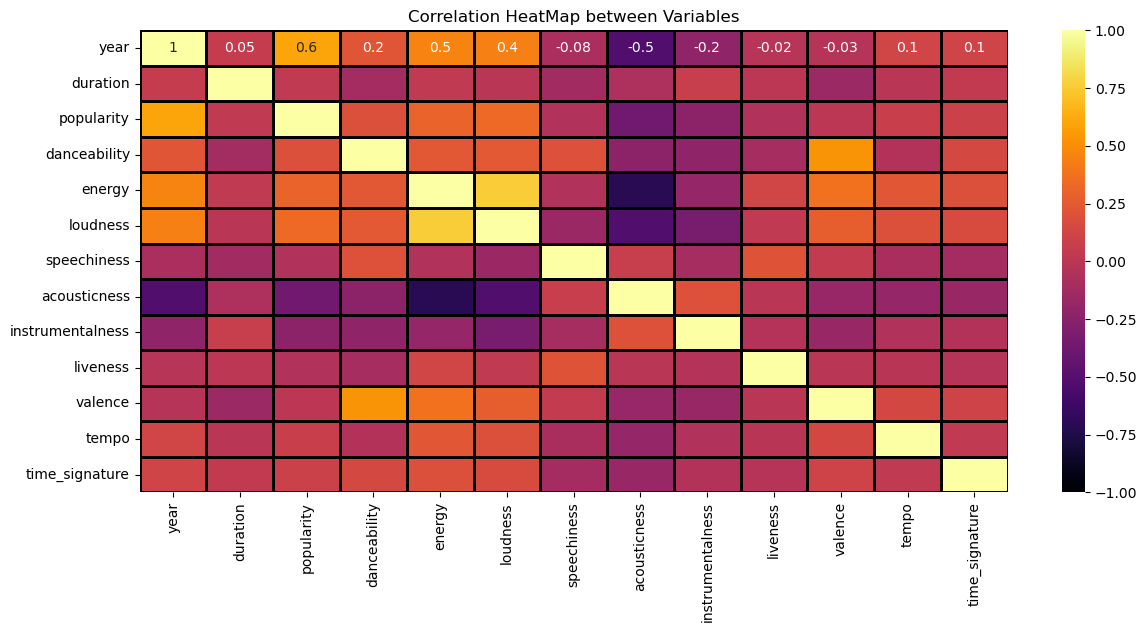

In [83]:
corr_df = df_tracks.drop(["name", "artists", "key", "mode", "explicit"], axis = 1).corr(method = "pearson")
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(corr_df,annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidths=1, linecolor = "Black")
heatmap.set_title("Correlation HeatMap between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

We will only consider correlation which has 0.5 and above absolute value

1) Year and Popularity have moderately positive correlation of 0.6. This is the direct effect of Spotify's algorithm on popularity. According to Spotify, a song's popularity is based on "the total number of plays the track has had and how recent those plays are". This means that people tend to play more recently released songs, probably due to the marketing efforts of the respective artists and their companies.
2) Year and Acousticness have moderately negative correlation of 0.5. Acousticness is defined as the element of a song that strays away from being electronically modified. Based on the correlation of -0.50 between Year and Acousticness, this musical element has seen a dramatic decrease as the years pass. This should be an effect of tech advancement in music industry. With the passing of years, Digital Audio Workstations(DAW) have become mainstream. This is also supported by the correlation of -0.4 between Popularity and Acousticness.
3) As Acousticness falls, a complementary musical element has to rise. This is supported by a strong negative correlation of -0.7 between Acousticness and Energy.
4) Energy and Loudness tend to go hand in hand. Hence a strong positive correlation of 0.8 between Energy and Loudness. Simultaneuosly , we can see a moderate negative correlation of -0.5 betweeen Loudness and Acousticness. This overall strengthens the fact that Energy and Loudness are supplementary whereas Acousticness is complementary to both.
5) As years pass, Energy and Loudness have increased with both have moderately strong correlation of 0.5 and 0.4 respectively, again explained by technological advancements in the music industry. This is supported with above point of decreased Acousticness as years pass by.
6) Valence describes the positiveness of the songs. Generally we tend to dance to positive songs. Hence, a moderately strong correlation of 0.5 between Valence and Danceability was expected

1) Danceability: It has sustained generally high levels in music throughout the years. However, we can observe a sharp drop between 1940 to 1955. This is the effect of World War 2, post-war society and freedom from colonial powers. Music back then had a more somber and heroic tone.
2) Valence: Valence measures how positive or happy a song is. As mentioned above, it saw a sharp drop during and after World War 2 for similar reasons Post 1955, we had the advent of the Vietnam war. Hippie music started gaining traction as an opposing force to the concept of wars. Hence, we see a rise in Valence post 1955.
3) Acousticness: We can see a dramatic decrease in Acousticness.  Post 1960, rock music began to dominate the music industry. After the rock era, we saw the rise of pop music and Electronic Digital Music (EDM). Hence post 1960, with the technological breakthroughs in music production, acousticness took a back seat in the music industry
4) Instrumentalness: Similar to Acousticness, we can see a dramatic decrease post 1960 for similar reasons mentioned above. Instrumentalness was high between 1920 to 1950, due to the dominance of Blues genre which had a high involvement of different instruments like saxophone, trumpets and cello.
5) Energy: Exactly opposite to Acousticness and Instrumentalness , Energy increases steadily post 1960. This is attributed to the rise of genres like death metal, EDM and rock. Energy reached its peak post 2000 due to technological involvement of Digital Audio Workstations(DAW)
6) Speechiness: Speechiness falled dramatically post 1940. This is because the importance of lyrics has fallen with time and importance of music in songs has grown. Songs are shorter in length as time has passed. Hence, we have fewer words as compared to pre-1940 music industry where songs were long and had more lyrical component. 

Text(0.5, 1.0, 'Bar plot of explicit vs. non-explicit songs on Spotify through the years.')

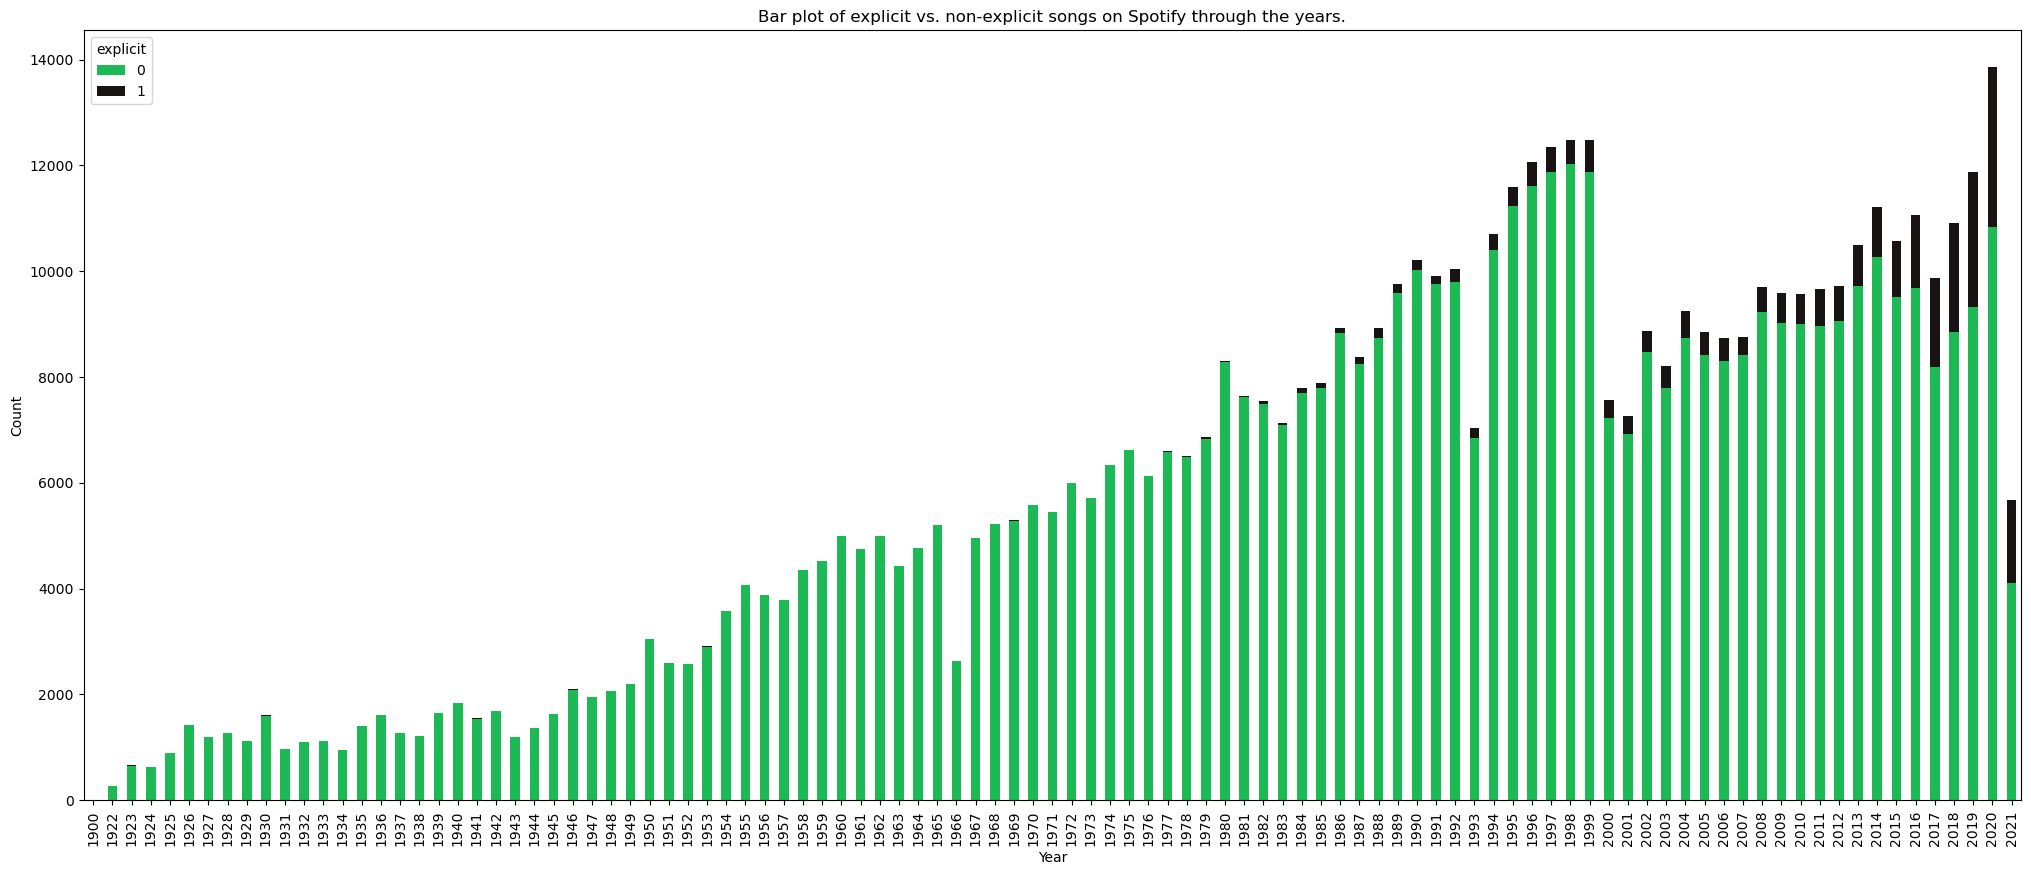

In [86]:
# Creating Stacked Bar Plot for understanding the involvement of explicit content in music


df_tracks.groupby(["year", "explicit"]).size().unstack().plot(kind="bar", stacked="True", figsize=(25,10), color=["#1db954", "#191414"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Bar plot of explicit vs. non-explicit songs on Spotify through the years.")


Based on the above Stacked Bar Plot where '1' corresponds to explicit songs, we can see that explicit songs have increased in number post 1990. 


In [88]:
pd.set_option('display.max_columns', None) # Jupyter display setting
pd.set_option('display.expand_frame_repr', False) # Jupyter display setting
pd.set_option('max_colwidth', None) # Jupyter display setting
explicits = df_tracks.groupby("explicit")["year"].value_counts() # Get the count between explicit and non-explicit songs by year
df_explicits=pd.DataFrame([explicits[0], explicits[1]], index=["not explicit", "explicit"])# Convert to DataFrame




In [89]:
df_explicits

year,1998,1997,1999,1996,1995,2020,1994,2014,1990,1992,1991,2013,2016,1989,2015,2019,2008,2012,2009,2010,2011,2018,1986,1988,2004,2002,2007,2005,2006,1980,1987,2017,1985,2003,1984,1981,1982,2000,1983,2001,1993,1979,1975,1977,1978,1974,1976,1972,1973,1970,1971,1969,1968,1965,1960,1962,1967,1964,1961,1959,1963,1958,2021,1955,1956,1957,1954,1950,1953,1966,1951,1952,1949,1946,1948,1947,1940,1942,1939,1945,1936,1930,1941,1926,1935,1944,1928,1937,1938,1943,1927,1933,1929,1932,1931,1934,1925,1923,1924,1922,1900
not explicit,12018.0,11882.0,11875.0,11606.0,11240.0,10832.0,10394.0,10261.0,10032.0,9799.0,9751.0,9729.0,9687.0,9591.0,9518.0,9325.0,9230.0,9061.0,9023.0,8998.0,8971.0,8842.0,8839.0,8744.0,8736.0,8466.0,8418.0,8416.0,8301.0,8277.0,8247.0,8180.0,7795.0,7787.0,7707.0,7617.0,7489.0,7221.0,7092.0,6923.0,6844.0,6830.0,6613.0,6585.0,6485.0,6339.0,6121.0,5991.0,5705.0,5585.0,5450.0,5278.0,5229.0,5194.0,5000.0,4998.0,4948.0,4766.0,4750.0,4522.0,4424.0,4346.0,4102.0,4063.0,3878.0,3789.0,3571.0,3039.0,2901.0,2630.0,2592.0,2581.0,2195.0,2091.0,2067.0,1955.0,1841.0,1687.0,1641.0,1636.0,1616.0,1599.0,1541.0,1417.0,1404.0,1357.0,1270.0,1266.0,1217.0,1189.0,1188.0,1118.0,1113.0,1095.0,963.0,941.0,892.0,656.0,632.0,276.0,1.0
explicit,463.0,465.0,607.0,450.0,347.0,3030.0,317.0,946.0,171.0,240.0,151.0,763.0,1376.0,160.0,1059.0,2557.0,475.0,660.0,563.0,580.0,694.0,2076.0,84.0,180.0,503.0,410.0,347.0,437.0,443.0,25.0,139.0,1691.0,89.0,421.0,79.0,31.0,55.0,336.0,32.0,332.0,186.0,32.0,10.0,24.0,17.0,1.0,11.0,5.0,6.0,3.0,3.0,14.0,NaN,6.0,1.0,NaN,1.0,1.0,NaN,NaN,2.0,NaN,1572.0,NaN,NaN,NaN,NaN,12.0,10.0,9.0,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,10.0,NaN,NaN,1.0,NaN,7.0,1.0,NaN,12.0,3.0,9.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN


In [90]:
df_new = df_explicits.T
df_new['year']= df_new.index

In [91]:
df_new.index = np.arange(0, len(df_new))

In [92]:
df_new

,not explicit,explicit,year
0,12018.0,463.0,1998
1,11882.0,465.0,1997
2,11875.0,607.0,1999
3,11606.0,450.0,1996
4,11240.0,347.0,1995
...,...,...,...
96,892.0,NaN,1925
97,656.0,1.0,1923
98,632.0,1.0,1924
99,276.0,NaN,1922


[Text(0.5, 1.0, 'Growth in Explicit Songs')]

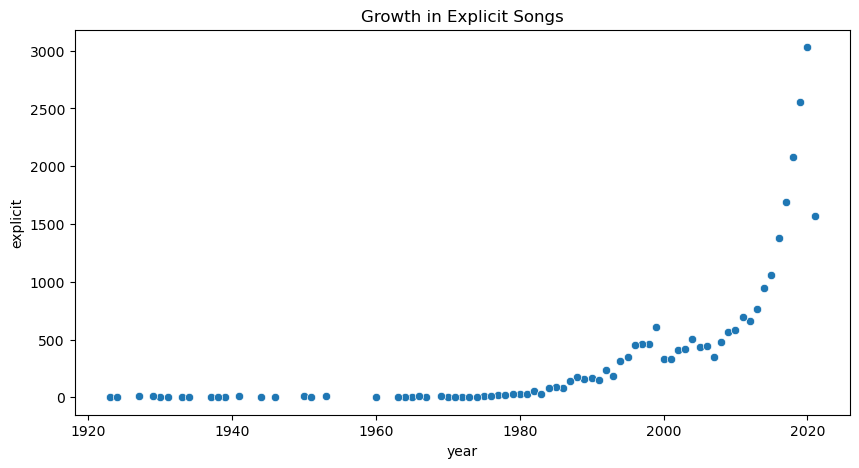

In [93]:
#Number of explicit songs growth by year
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(y=df_new['explicit'],x=df_new['year']).set( 
    title="Growth in Explicit Songs")

In [156]:
# Is there any difference in popularity between explicity and non-explicit songs

df_tracks.groupby("explicit").boxplot(column="popularity")
plt.show()


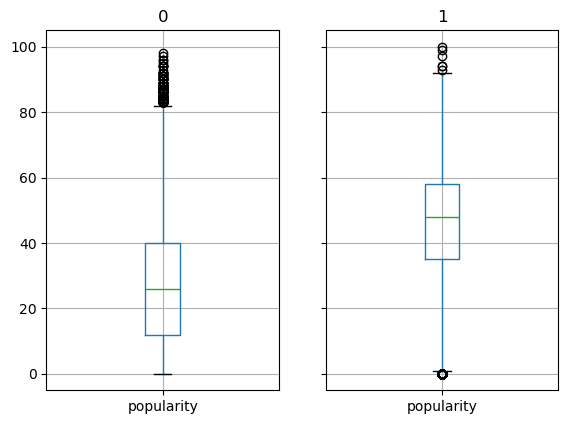

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

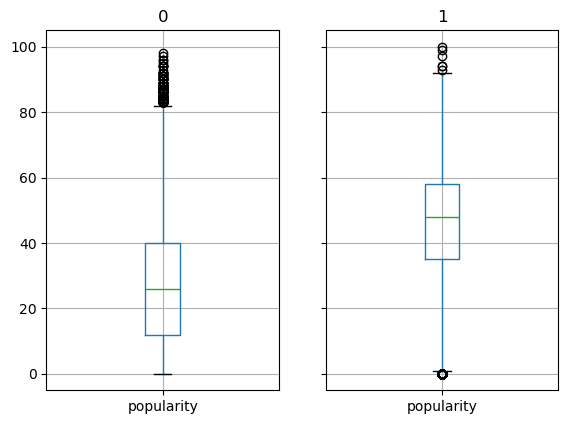

In [158]:
dfo = df_tracks.groupby("explicit")
cv = dfo.boxplot(column="popularity")
plt.show(cv)

From above BoxPlot, we can see that the average popularity lies around the 25-30 range for non explicit songs and around 50 for explicit songs. Therefore, explicit songs seem much more popular at first glance. Let's delve deeper by looking at statistics for above and taking outliers into account

In [47]:
df_tracks.groupby("explicit").agg({"popularity": ["mean", "median", "std", len]})

popularity                          
               mean median        std     len
explicit                                     
0         26.805521   26.0  17.909595  558933
1         45.792860   48.0  18.143112   25770

In [48]:
# Difference in mean

45.792860 - 26.805521

18.987339

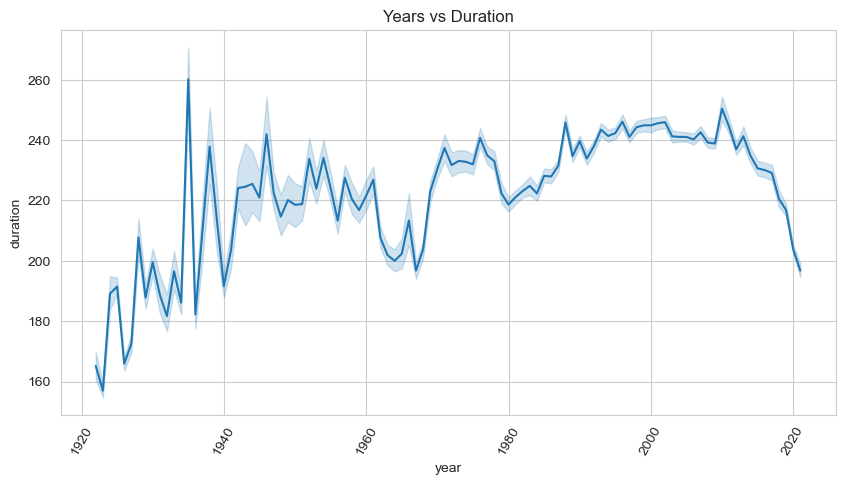

In [49]:
years = df_tracks.year
total_duration = df_tracks.duration
sns.set_style(style="whitegrid")
fig_dims = (10,5)
fig , ax = plt.subplots(figsize = fig_dims)
fig  = sns.lineplot(x=years , y=total_duration , ax=ax).set(title="Years vs Duration")
plt.xticks(rotation=60)
plt.show()

We can see that with decreasing attention span, song lengths have also been reducing post 2010

In [51]:
# Who are the top 10 artists between 1921-2020?
# As a second order popularity condition, artists must have more than 250 songs on Spotify
data_topArtists = df_tracks.sort_values(by='popularity', ascending=False)
print('***Most popular songs:***')
data_topArtists.loc[:,'artist'] = data_topArtists['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))

display(data_topArtists[['name', 'artist', 'popularity', 'year']].head(10))

data_topArtists['top_artist'] = data_topArtists['artists'].map(data_topArtists['artists'].value_counts()>50)
top_art  = data_topArtists.groupby(['artist', 'top_artist'])['popularity'].mean().sort_values(ascending=False).reset_index(1)
data_to_plot = top_art.loc[top_art['top_artist'] == True,['popularity']].head(20)

print('*artists with more than 200 songs on Spotify')

***Most popular songs:***


,name,artist,popularity,year
release_date,,,,
2021-03-19,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",100,2021
2021-08-01,drivers license,Olivia Rodrigo,99,2021
2021-06-01,Astronaut In The Ocean,Masked Wolf,98,2021
2020-04-12,telepatía,Kali Uchis,97,2020
2020-03-20,Save Your Tears,The Weeknd,97,2020
2021-05-03,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic",96,2021
2020-03-20,Blinding Lights,The Weeknd,96,2020
2020-09-16,The Business,Tiësto,95,2020
2019-07-11,Streets,Doja Cat,94,2019


*artists with more than 200 songs on Spotify


In [52]:
# added new column - popularity category based on popularity score
import numpy as np

# Define the popularity categories based on the provided ranges
conditions = [
    (df_tracks['popularity'] >= 0) & (df_tracks['popularity'] <= 25),
    (df_tracks['popularity'] >= 26) & (df_tracks['popularity'] <= 50),
    (df_tracks['popularity'] >= 51) & (df_tracks['popularity'] <= 75),
    (df_tracks['popularity'] >= 76) & (df_tracks['popularity'] <= 100)
]

# Define the corresponding category names
categories = ['Emerging', 'Upcoming', 'MainstreamHits', 'ChartToppers']

# Create a new column 'popularity_category' in the dataset
df_tracks['popularity_category'] = np.select(conditions, categories, default='Unknown')

# Display the first few rows of the modified dataset
df_tracks.head()

,name,artists,year,duration,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key,mode,popularity_category
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,Carve,['Uli'],1922,127,0,6,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,3,0,1,Emerging
1922-01-06,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],1922,98,0,0,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,1,0,1,Emerging
1922-03-21,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],1922,182,0,0,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1,1,Emerging
1922-03-21,El Prisionero - Remasterizado,['Ignacio Corsini'],1922,177,0,0,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,3,7,1,Emerging
1922-01-01,Lady of the Evening,['Dick Haymes'],1922,163,0,0,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,4,3,0,Emerging


In [54]:
# Filter the dataset to include only rows where 'popularity_category' is 'Chart-Toppers'
chart_toppers_dataset = df_tracks[df_tracks['popularity_category'] == 'ChartToppers']

# Aggregate the data to get the count of chart-topping songs for each artist
artists_chart_toppers_count = chart_toppers_dataset['artists'].value_counts().reset_index()
artists_chart_toppers_count.columns = ['artists', 'chart_toppers_count']
artists_chart_toppers_count.loc[:,'artists'] = artists_chart_toppers_count['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))


# Select the top 10 artists with the most chart-topping songs
top_10_artists_chart_toppers = artists_chart_toppers_count.head(10)
top_10_artists_chart_toppers

,artists,chart_toppers_count
0,Taylor Swift,34
1,Billie Eilish,22
2,Juice WRLD,20
3,BTS,18
4,Bad Bunny,16
5,Harry Styles,15
6,One Direction,15
7,Bruno Mars,15
8,Justin Bieber,14
9,Rihanna,13


In [56]:
df_swiftie = df_tracks[df_tracks['artists'] == "['Taylor Swift']"]
df_swiftie.loc[:,'artists'] = df_swiftie['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))


In [58]:
swift_count = df_swiftie.groupby('year')['artists'].count()
swift_count

year
2006    34
2008    63
2009     2
2010    69
2011     1
2012    46
2014    56
2017    13
2019    16
2020    26
2021    26
Name: artists, dtype: int64

In [60]:
#Grouped DataFrame

swift_values = swift_count.values[:]
swift_index = swift_count.index[:] 




swift_line = df_swiftie[['year','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
swift_line = swift_line.groupby('year').mean()
swift_line['year'] = swift_line.index
swift_line = swift_line.dropna()

#Setting the axes



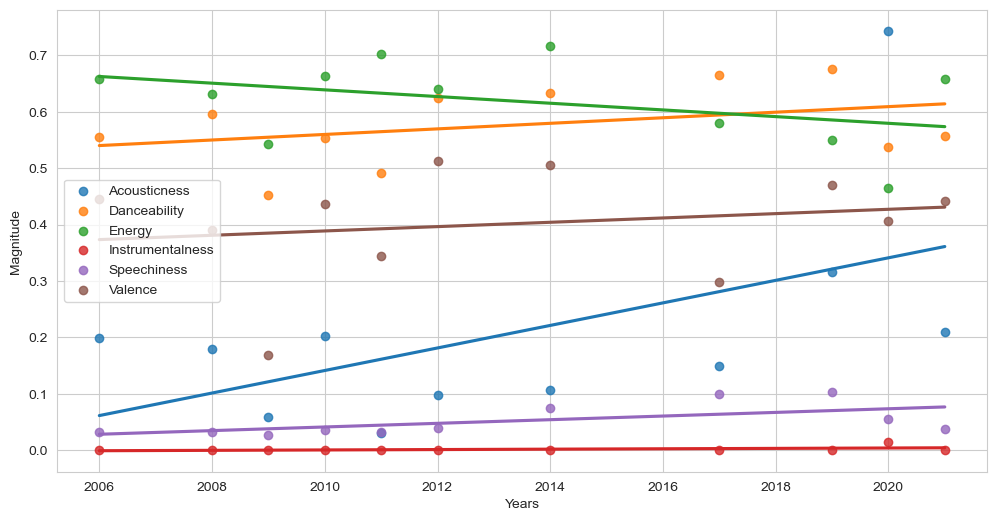

In [62]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# add the plots for each dataframe
sns.regplot(x='year', y='acousticness', data=swift_line, fit_reg=True, ci=None, ax=ax, label='Acousticness')
sns.regplot(x='year', y='danceability', data=swift_line, fit_reg=True, ci=None, ax=ax, label='Danceability')
sns.regplot(x='year', y='energy', data=swift_line, fit_reg=True, ci=None, ax=ax, label='Energy')
sns.regplot(x='year', y='instrumentalness', data=swift_line, fit_reg=True, ci=None, ax=ax, label='Instrumentalness')
sns.regplot(x='year', y='speechiness', data=swift_line, fit_reg=True, ci=None, ax=ax, label='Speechiness')
sns.regplot(x='year', y='valence', data=swift_line, fit_reg=True, ci=None, ax=ax, label='Valence')
ax.set(ylabel='Magnitude', xlabel='Years')
ax.legend()
plt.show()

In [64]:
df_lataji = df_tracks[df_tracks['artists'] == "['Lata Mangeshkar']"]
df_lataji.loc[:,'artists'] = df_lataji['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))
df_lataji.head()

,name,artists,year,duration,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key,mode,popularity_category
release_date,,,,,,,,,,,,,,,,,,,
1937-01-12,Ja Re Ja Re Ud Ja Re Panchhi,Lata Mangeshkar,1937,256,0,7,0.316,0.326,-11.267,0.0349,0.982,0.05010,0.157,0.489,138.937,4,1,0,Emerging
1937-01-12,Ae Dil Kahan Teri Manzil - Sad Version,Lata Mangeshkar,1937,145,0,1,0.377,0.339,-9.971,0.0304,0.980,0.06560,0.209,0.561,142.149,3,1,1,Emerging
1939-12-16,Kal Ke Sapne Aaj Bhi Aana,Lata Mangeshkar,1939,221,0,1,0.457,0.365,-10.516,0.0296,0.980,0.00387,0.175,0.837,96.928,4,8,1,Emerging
1939-12-16,Kari Badariya,Lata Mangeshkar,1939,266,0,1,0.369,0.410,-10.734,0.0335,0.986,0.00180,0.326,0.739,150.477,3,5,1,Emerging
1940-01-12,Woh Dil Kahan Se Laoon,Lata Mangeshkar,1940,198,0,4,0.357,0.225,-10.055,0.0432,0.930,0.00406,0.188,0.453,180.081,4,11,0,Emerging


In [66]:
lataji_count = df_lataji.groupby('year')['artists'].count()
lataji_count

year
1937    2
1939    2
1940    1
1941    1
1942    5
       ..
2002    1
2005    1
2007    1
2012    2
2013    1
Name: artists, Length: 66, dtype: int64

In [68]:
lataji_line = df_lataji[['year','acousticness','danceability','energy','instrumentalness','speechiness','valence']]

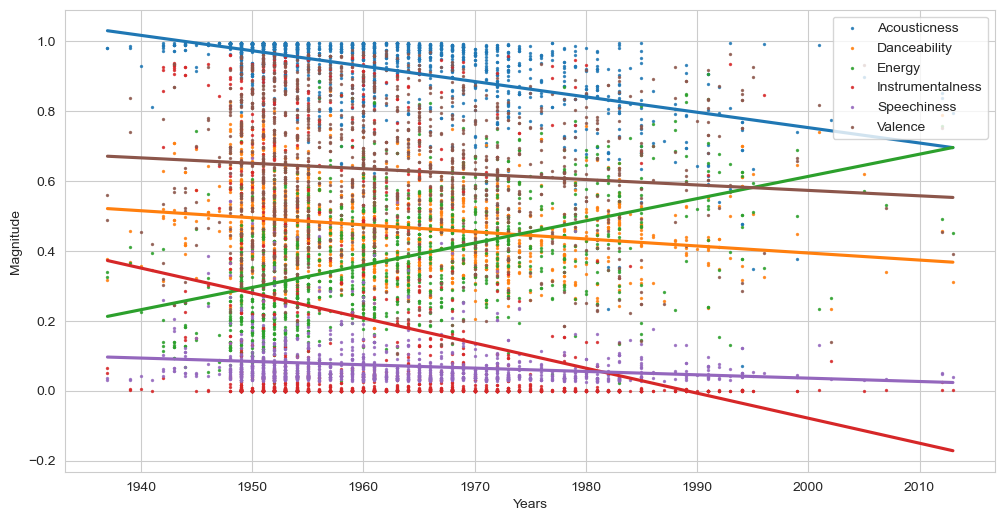

In [70]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# add the plots for each dataframe
sns.regplot(x='year', y='acousticness', data=lataji_line, fit_reg=True, ci=None, ax=ax, label='Acousticness', scatter_kws={'s':2})
sns.regplot(x='year', y='danceability', data=lataji_line, fit_reg=True, ci=None, ax=ax, label='Danceability', scatter_kws={'s':2})
sns.regplot(x='year', y='energy', data=lataji_line, fit_reg=True, ci=None, ax=ax, label='Energy', scatter_kws={'s':2})
sns.regplot(x='year', y='instrumentalness', data=lataji_line, fit_reg=True, ci=None, ax=ax, label='Instrumentalness', scatter_kws={'s':2})
sns.regplot(x='year', y='speechiness', data=lataji_line, fit_reg=True, ci=None, ax=ax, label='Speechiness', scatter_kws={'s':2})
sns.regplot(x='year', y='valence', data=lataji_line, fit_reg=True, ci=None, ax=ax, label='Valence', scatter_kws={'s':2})
ax.set(ylabel='Magnitude', xlabel='Years')
ax.legend()
plt.show()